<a href="https://colab.research.google.com/github/naomifridman/Introduction_to_deep_learning/blob/master/Deep_Learning_keras_part4_train_callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Deep Learning 
# Part 4 - Keras Train callbacks
### Example Fushion Mnist data

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np

import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def print_stats(ytest, ypred):
    
    print("Accuracy: {:.5f}".format(accuracy_score(ytest, ypred)))
    print("Confusion Matrix:")
    print(confusion_matrix(ytest, ypred))
    print("Classification Report:")
    print(classification_report(ytest, ypred))

In [0]:
def show_list_images(imgs, titles=None):
    n_img = len(imgs)
    fig, m_axs = plt.subplots(1, n_img, figsize = (n_img*2, 4))
    i = 0
    for (c_im) in m_axs.T:
        c_im.imshow(imgs[i])
        c_im.axis('off')
        if (titles is not None):
            c_im.set_title(titles[i])
        i+=1

In [0]:
def drow_history(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+ metric])
    plt.title('model '+metric)
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()    

## Keras summary
### Sequential Model
https://keras.io/models/sequential/

### Dense layer
https://keras.io/layers/core/

### Dropout layer
https://keras.io/layers/core/

### Optimizer RMSprop, Adam, SGD
https://keras.io/optimizers/

In [0]:
import keras
# Keras has many build in data sets
from keras.datasets import mnist
# Sequential is the basic feed forward neural network (FFN)
from keras.models import Sequential
# Dense is fully connected layer
# Dropout is a "noising" layer, to prevent over feet.
from keras.layers import Dense, Dropout
# Read about optimizers in keras documentation
from keras.optimizers import RMSprop

In [0]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

## Classification Exercise Fashion Mnist
https://keras.io/datasets/
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST. The class labels are:
```
* Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
```

Build the best model for this data

## Load and Preprocess Data

In [0]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [20]:
x_train[0].shape, x_train.shape,x_test.shape

((28, 28), (60000, 28, 28), (10000, 28, 28))

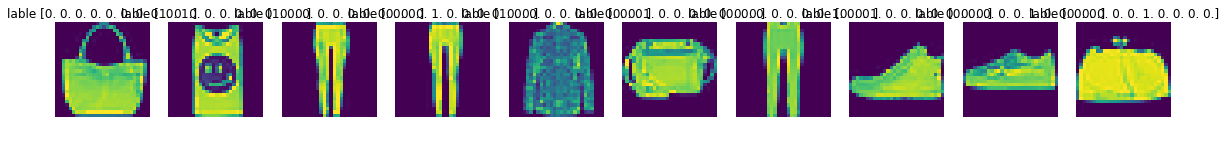

In [29]:
imgs = [x_train[i].reshape(28,28) for i in range(100,110)]
titles = [("lable {}").format(y_train[i]) for i in range(20)]
show_list_images(imgs, titles)

In [22]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [23]:
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Build Keras Basic Model

In [24]:
def get_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

model=get_model()
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________




In [25]:
history = model.fit(x_train, y_train,
                    batch_size=40,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 13s 215us/step - loss: 0.5021 - acc: 0.8182 - val_loss: 0.4836 - val_acc: 0.8227
Epoch 2/4
60000/60000 [==============================] - 9s 142us/step - loss: 0.4031 - acc: 0.8601 - val_loss: 0.4007 - val_acc: 0.8633
Epoch 3/4
60000/60000 [==============================] - 8s 140us/step - loss: 0.3750 - acc: 0.8705 - val_loss: 0.3967 - val_acc: 0.8654
Epoch 4/4
60000/60000 [==============================] - 8s 135us/step - loss: 0.3628 - acc: 0.8763 - val_loss: 0.4198 - val_acc: 0.8576


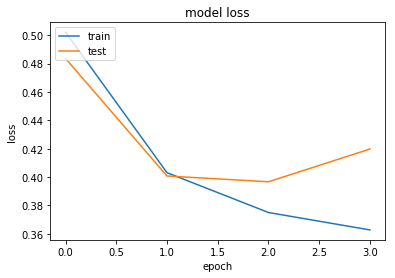

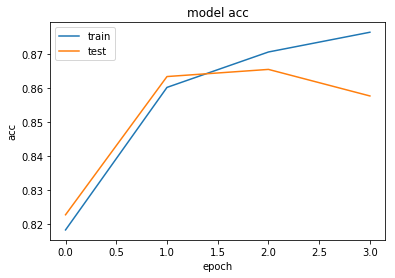

In [30]:
drow_history(history, 'loss')
drow_history(history, 'acc')

## Evaluate

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4197646573066711
Test accuracy: 0.8576


## Predict

In [32]:
pred_test = model.predict(x_test)
pred_test[0:5]

array([[1.3541380e-09, 1.1113264e-09, 4.8882809e-10, 5.4652988e-10,
        8.1387792e-11, 2.9753903e-03, 4.8104624e-08, 7.3651592e-03,
        6.2294063e-08, 9.8965925e-01],
       [1.7699369e-07, 5.9902936e-14, 9.9905807e-01, 5.8234162e-10,
        1.9532569e-04, 5.4544563e-13, 7.4651500e-04, 5.0701700e-12,
        4.7825544e-09, 1.0573789e-12],
       [2.0507228e-24, 1.0000000e+00, 0.0000000e+00, 4.9004197e-23,
        0.0000000e+00, 5.7088559e-32, 2.9061181e-30, 2.3621094e-36,
        7.1954030e-37, 0.0000000e+00],
       [1.0589271e-27, 1.0000000e+00, 0.0000000e+00, 8.0814647e-22,
        3.8539914e-38, 1.1521439e-30, 1.4943886e-32, 1.6634700e-33,
        7.9717578e-37, 0.0000000e+00],
       [3.1225300e-01, 1.9644383e-06, 5.6249779e-02, 1.4754609e-02,
        9.6847313e-03, 3.0904462e-07, 6.0647011e-01, 8.8864618e-07,
        5.8452255e-04, 1.6788658e-07]], dtype=float32)

In [33]:
y_pred_test=np.argmax(pred_test, axis=1)
y_pred_test[0:10], y_test[0:10]

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [34]:
pred_test = model.predict_classes(x_test)
pred_test[0:5]

array([9, 2, 1, 1, 6])

In [35]:
print_stats(np.argmax(y_test, axis=1),y_pred_test )

Accuracy: 0.85760
Confusion Matrix:
[[902   1  15  10   3   1  58   0  10   0]
 [ 10 969   1  15   2   0   2   0   1   0]
 [ 19   2 760   7 168   0  42   1   1   0]
 [ 72  12  12 845  31   0  20   0   8   0]
 [  3   1  78  40 859   0  13   0   6   0]
 [  0   0   0   0   0 941   0  46   3  10]
 [225   5 120  15 206   0 412   0  17   0]
 [  0   0   0   0   0   4   0 960   0  36]
 [  1   0   4   7   2   2   2   4 978   0]
 [  0   1   0   0   0  15   1  33   0 950]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.90      0.84      0.87      1000
           4       0.68      0.86      0.76      1000
           5       0.98      0.94      0.96      1000
           6       0.75      0.41      0.53      1000
           7       0.92      0.96      0.94      1000
           8       0.96

# Keras callbacks
* https://keras.io/callbacks/

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


earlystopper = EarlyStopping(patience=5, monitor='val_acc', verbose=1)

filepath=".\\model_epoch_{epoch:03d}-acc_{acc:.3f}_loss_{loss:.3f}.hdf5"
checkpoint1 = ModelCheckpoint(filepath, monitor='acc', verbose=1, 
                              save_best_only=True, mode='max',
                             save_weights_only=True)

filepath=".\\model_epoch_{epoch:03d}_val_acc_{val_acc:.4f}_val_loss_{val_loss:.4f}.hdf5"
checkpoint2 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, 
                              save_best_only=True, mode='max',
                             save_weights_only=True)

filepath=".\\model_epoch_{epoch:03d}_acc{acc:.3f}_loss{loss:.3f}.hdf5"
checkpoint3 = ModelCheckpoint(filepath, monitor='loss', verbose=1, 
                              save_best_only=True, mode='min',
                             save_weights_only=True)

filepath=".\\model_epoch_{epoch:03d}_val_acc{val_acc:.4f}_val_loss{val_loss:.4f}.hdf5"
checkpoint4 = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, 
                              save_best_only=True, mode='min',
                             save_weights_only=True)

filepath=".\\model_last.hdf5"
checkpoint5 = ModelCheckpoint(filepath, monitor='val_loss', 
                              verbose=0, save_best_only=False,
                             save_weights_only=True)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=13, min_lr=0.000001, verbose=1,  cooldown=1)

In [0]:
model=get_model()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [38]:
history = model.fit(x_train, y_train,
                    batch_size=40,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test),
                   callbacks=[earlystopper, checkpoint1, checkpoint2, checkpoint3,
                             checkpoint4, checkpoint5, reduce_lr])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 143us/step - loss: 0.5070 - acc: 0.8170 - val_loss: 0.4564 - val_acc: 0.8482

Epoch 00001: acc improved from -inf to 0.81703, saving model to .\model_epoch_001-acc_0.817_loss_0.507.hdf5

Epoch 00001: val_acc improved from -inf to 0.84820, saving model to .\model_epoch_001_val_acc_0.8482_val_loss_0.4564.hdf5

Epoch 00001: loss improved from inf to 0.50700, saving model to .\model_epoch_001_acc0.817_loss0.507.hdf5

Epoch 00001: val_loss improved from inf to 0.45645, saving model to .\model_epoch_001_val_acc0.8482_val_loss0.4564.hdf5
Epoch 2/100
60000/60000 [==============================] - 8s 136us/step - loss: 0.4016 - acc: 0.8594 - val_loss: 0.4249 - val_acc: 0.8544

Epoch 00002: acc improved from 0.81703 to 0.85938, saving model to .\model_epoch_002-acc_0.859_loss_0.402.hdf5

Epoch 00002: val_acc improved from 0.84820 to 0.85440, saving model to .\model_epoch_002_val_acc_0.

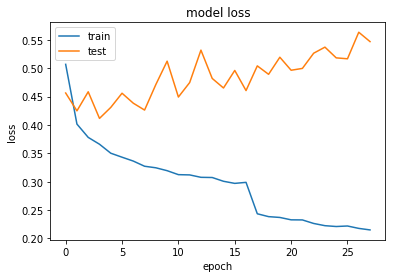

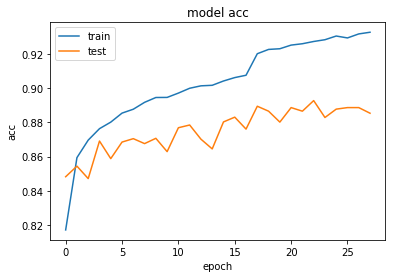

In [39]:
drow_history(history, 'loss')
drow_history(history, 'acc')

In [40]:
y_pred_test=model.predict_classes(x_test)
print_stats(np.argmax(y_test, axis=1),y_pred_test )

Accuracy: 0.88540
Confusion Matrix:
[[870   4  20  31   3   3  60   0   9   0]
 [  2 983   0  12   1   0   1   0   1   0]
 [ 17   3 859  18  65   0  36   0   2   0]
 [ 15  18  13 905  32   2  11   0   4   0]
 [  1   2 126  32 810   0  28   0   1   0]
 [  0   0   0   0   0 979   1  11   1   8]
 [156   6 126  37  81   1 577   0  16   0]
 [  0   0   0   0   0  24   0 961   1  14]
 [  5   0   6   6   1   3   1   5 973   0]
 [  0   0   0   0   0   7   1  55   0 937]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1000
           1       0.97      0.98      0.98      1000
           2       0.75      0.86      0.80      1000
           3       0.87      0.91      0.89      1000
           4       0.82      0.81      0.81      1000
           5       0.96      0.98      0.97      1000
           6       0.81      0.58      0.67      1000
           7       0.93      0.96      0.95      1000
           8       0.97

In [0]:
model=get_model()
model.load_weights('.\model_epoch_023_val_acc_0.8928_val_loss_0.5266.hdf5')
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [43]:
y_pred_test=model.predict_classes(x_test)
print_stats(np.argmax(y_test, axis=1),y_pred_test )

Accuracy: 0.89280
Confusion Matrix:
[[862   1  17  18   7   4  87   0   4   0]
 [  1 972   3  15   4   0   5   0   0   0]
 [ 15   0 816   9  81   1  77   0   1   0]
 [ 21   8  14 888  36   0  29   0   4   0]
 [  0   0 107  33 786   0  74   0   0   0]
 [  0   0   0   0   0 981   0  10   2   7]
 [104   1  73  22  52   0 743   0   5   0]
 [  0   0   0   0   0  20   0 962   1  17]
 [  6   0   3   5   5   3   8   5 965   0]
 [  0   0   0   0   0   7   1  39   0 953]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.90      0.89      0.89      1000
           4       0.81      0.79      0.80      1000
           5       0.97      0.98      0.97      1000
           6       0.73      0.74      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.98

### Learn more:
* https://keras.io/
* https://www.coursera.org/learn/neural-networks/lecture/kOQiH/why-object-recognition-is-difficult-5-min